In [3]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [2]:
%matplotlib inline

In [3]:
#DATA_FILE = 'uber-pickups-in-new-york-city//uber-raw-data-aug14.csv'
#uber_data = pd.read_csv(DATA_FILE)
#uber_data.head()

In [21]:
uber_raw_apr14 =pd.read_csv('uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
uber_raw_may14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
uber_raw_jun14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
uber_raw_jul14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
uber_raw_aug14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
uber_raw_sep14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

uber_2014 = [uber_raw_apr14, uber_raw_may14, uber_raw_jun14, uber_raw_jul14, uber_raw_aug14, uber_raw_sep14]
uber_data = pd.concat(uber_2014,axis=0,ignore_index=True)
#uber_data=uber_raw_apr14
uber_data.head()
#typeof(uber_2014$`Date/Time`)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [22]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [23]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['Month'] = uber_data['Date/Time'].dt.month
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

uber_data.tail()

,Date/Time,Lat,Lon,Base,Month,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,1,Tuesday,30,22
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,1,Tuesday,30,22
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,1,Tuesday,30,22
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,1,Tuesday,30,22
4534326,2014-09-30 22:58:00,40.7140,-73.9496,B02764,9,1,Tuesday,30,22


In [9]:
#uber_data= uber_data.drop(columns = ["Month"])

In [24]:
uber_data.groupby(pd.Grouper(key='DayOfWeek')).count()

,Date/Time,Lat,Lon,Base,Month,DayOfWeekNum,MonthDayNum,HourOfDay
DayOfWeek,,,,,,,,
Tuesday,663789,663789,663789,663789,663789,663789,663789,663789
Wednesday,696488,696488,696488,696488,696488,696488,696488,696488
Thursday,755145,755145,755145,755145,755145,755145,755145,755145
Friday,741139,741139,741139,741139,741139,741139,741139,741139
Saturday,646114,646114,646114,646114,646114,646114,646114,646114
Sunday,490180,490180,490180,490180,490180,490180,490180,490180
Monday,541472,541472,541472,541472,541472,541472,541472,541472


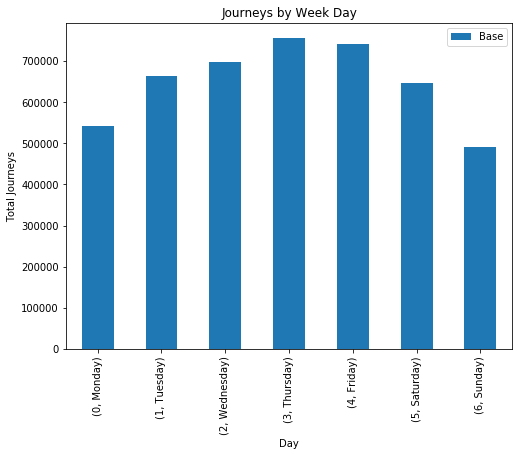

In [25]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.xlabel('Day')
plt.title('Journeys by Week Day');

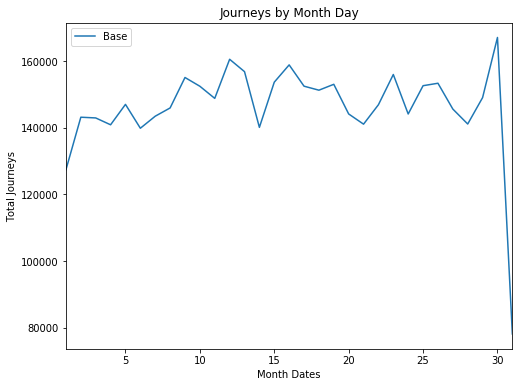

In [26]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='line', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.xlabel('Month Dates')
plt.title('Journeys by Month Day');

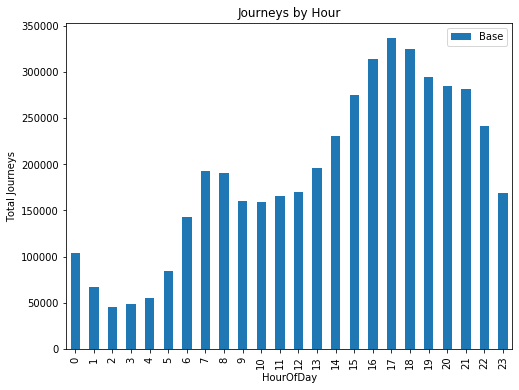

In [27]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

In [28]:
uber_data.groupby(pd.Grouper(key='Base')).count()

,Date/Time,Lat,Lon,Month,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
Base,,,,,,,,
B02512,205673,205673,205673,205673,205673,205673,205673,205673
B02598,1393113,1393113,1393113,1393113,1393113,1393113,1393113,1393113
B02617,1458853,1458853,1458853,1458853,1458853,1458853,1458853,1458853
B02682,1212789,1212789,1212789,1212789,1212789,1212789,1212789,1212789
B02764,263899,263899,263899,263899,263899,263899,263899,263899


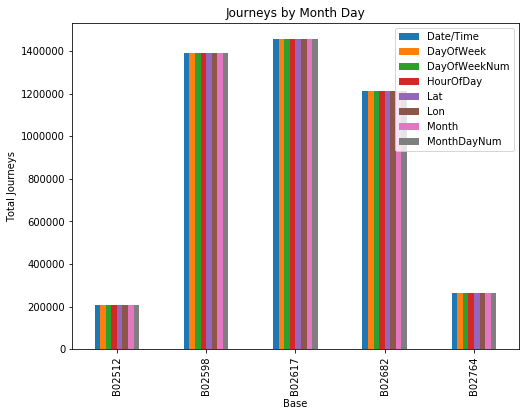

In [29]:
uber_monthdays = uber_data.pivot_table(index=['Base'],
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');